# Wing example using guide curves #

We still want have more control on the shape of the wing example.

One option is to simply add more profiles and tweak their shape. Another, more elegant way is to additionally use some guide curves for e.g. the leading and trailing edges.

In this example, we are tweaking the leading edge and using our curve network interpolation algorithm that is based on gordon surfaces. Gordon surfaces are generalization of coons patches. Where coons patches can only interpolate two profiles and two guides at a time, gordon surfaces interpolate all curves at once globally. The benefit of gordon surfaces are better / smoother resulting surfaces.

If you want to read about them im more detail, have a look into _"The NURBS Book, 2nd Edition"_, Chapter 10.5 (Interpolation of a Bidirectional Curve Network): https://www.springer.com/de/book/9783642973857

## Importing modules ##

Again, all low lovel geomtry functions can be found in the ```tigl3.geometry``` module. The actual gordon surface algorithm is the class ```CTiglInterpolateCurveNetwork``` from the ```tigl3.geometry``` module. For a more convenient use,
we again use the module __```tigl3.surface_factories```__ , which we are using now.

In [1]:
import tigl3.curve_factories
import tigl3.surface_factories
from OCC.gp import gp_Pnt
from OCC.Display.SimpleGui import init_display
import numpy as np

## Create profile points ##

We again create the same profiles as in the Wing example. The wing should have one curve at its root, one at its outer end and one at the tip of a winglet.

In [2]:
# list of points on NACA2412 profile
px = [1.000084, 0.975825, 0.905287, 0.795069, 0.655665, 0.500588, 0.34468, 0.203313, 0.091996, 0.022051, 0.0, 0.026892, 0.098987, 0.208902, 0.346303, 0.499412, 0.653352, 0.792716, 0.90373, 0.975232, 0.999916]
py = [0.001257, 0.006231, 0.019752, 0.03826, 0.057302, 0.072381, 0.079198, 0.072947, 0.054325, 0.028152, 0.0, -0.023408, -0.037507, -0.042346, -0.039941, -0.033493, -0.0245, -0.015499, -0.008033, -0.003035, -0.001257]

points_c1 = np.array([pnt for pnt in zip(px, [0.]*len(px), py)]) * 2.
points_c2 = np.array([pnt for pnt in zip(px, [0]*len(px), py)])
points_c3 = np.array([pnt for pnt in zip(px, py, [0.]*len(px))]) * 0.2

# shift sections to their correct position
# second curve at y = 7
points_c2 += np.array([1.0, 7, 0])

# third curve at y = 7.5
points_c3[:, 1] *= -1
points_c3 += np.array([1.7, 7.8, 1.0])

## Create guide curve points ##

Now, lets define some points on the guide curves. __Important: profiles and guides must intersect each other!!!__

Therefore, we explicitly add points from the profiles to the guides curves.

In [3]:
# upper trailing edge points
te_up_points = np.array([points_c1[0,:], points_c2[0,:], points_c3[0,:]])

# leading edge points. 
le_points = np.array([
    points_c1[10,:],    # First profile LE

    [0.35, 2., -0.1],# Additional point to control LE shape
    [0.7, 5., -0.2], # Additional point to control LE shape
    
    points_c2[10,:],   # Second profile LE
    points_c3[10,:], # Third profile LE
])


# lower trailing edge points
te_lo_points = np.array([points_c1[-1,:], points_c2[-1,:], points_c3[-1,:]])


## Build profiles curves ##

Now, lets built the profiles curves using ```tigl3.curve_factories.interpolate_points``` as done in the Airfoil example.

In [4]:
profile_1 = tigl3.curve_factories.interpolate_points(points_c1)
profile_2 = tigl3.curve_factories.interpolate_points(points_c2)
profile_3 = tigl3.curve_factories.interpolate_points(points_c3)

In [5]:
# Lets define also the parameters of the points to control the shape of the guide curve
# This is optional, but can improve the result
te_up = tigl3.curve_factories.interpolate_points(te_up_points, [0, 0.65, 1.])
le = tigl3.curve_factories.interpolate_points(le_points, [0., 0.25, 0.55, 0.8, 1.0])
te_lo = tigl3.curve_factories.interpolate_points(te_lo_points, [0, 0.65, 1.])

## Check: Draw the curves ##

Now lets draw the curves. You can still tweak the leadning edge, if you want.

In [6]:
# start up the gui
display, start_display, add_menu, add_function_to_menu = init_display()

# make tesselation more accurate
display.Context.SetDeviationCoefficient(0.0001)

# draw the curve 
display.DisplayShape(profile_1)
display.DisplayShape(profile_2)
display.DisplayShape(profile_3)
display.DisplayShape(te_up)
display.DisplayShape(le)
display.DisplayShape(te_lo)

# also draw the guide curve points
for point in le_points:
    display.DisplayShape(gp_Pnt(*point), update=False)
for point in te_up_points:
    display.DisplayShape(gp_Pnt(*point), update=False)
for point in te_lo_points:
    display.DisplayShape(gp_Pnt(*point), update=False)
    
# match content to screen and start the event loop
display.FitAll()
start_display()

INFO:OCC.Display.backend:backend loaded: qt-pyqt5
INFO:OCC.Display.SimpleGui:GUI backend set to: qt-pyqt5


Result:
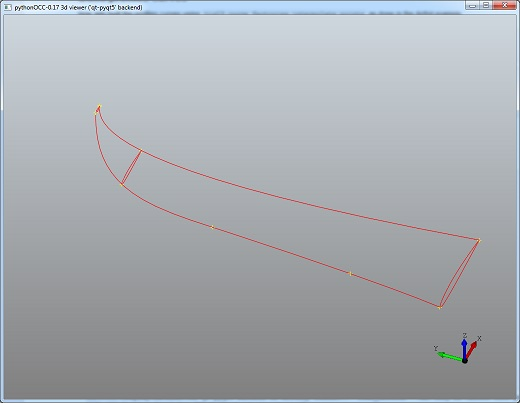

## Create the gordon surface ##
The final surface is created with the Gordon surface interpolation from the ```tigl3.surface_factories``` package.

Gordon surfaces are surfaces, that passes through a network of curves. Since we just created this network with 3 profiles and 3 guides, we can pass those to the algorithm.

In [7]:
surface = tigl3.surface_factories.interpolate_curve_network([profile_1, profile_2, profile_3],
                                                            [te_up, le, te_lo])

## Visualize the result ##

Now, lets draw our wing. How does it look like? What can be improved?

__Note: a separate window with the 3D Viewer is opening!__

In [8]:
# start up the gui
display, start_display, add_menu, add_function_to_menu = init_display()

# make tesselation more accurate
display.Context.SetDeviationCoefficient(0.00007)

# draw the curve 
display.DisplayShape(profile_1)
display.DisplayShape(profile_2)
display.DisplayShape(profile_3)
display.DisplayShape(te_up)
display.DisplayShape(le)
display.DisplayShape(te_lo)
display.DisplayShape(surface)
    
# match content to screen and start the event loop
display.FitAll()
start_display()

INFO:OCC.Display.backend:The qt-pyqt5 backend is already loaded...``load_backend`` can only be called once per session
INFO:OCC.Display.SimpleGui:GUI backend set to: qt-pyqt5


Result:
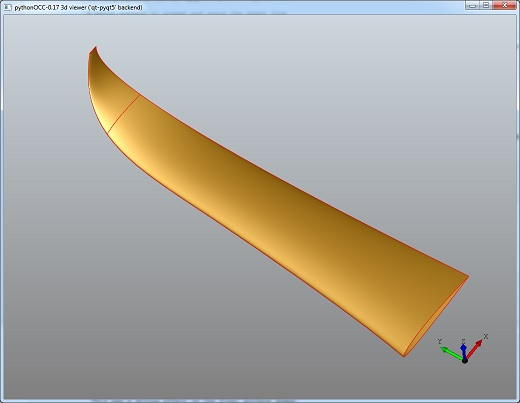